<a href="https://colab.research.google.com/github/sagr612/cartonify_image/blob/main/cartonify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import sys

In [15]:
from google.colab import drive

In [17]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt

In [25]:
 from google.colab.patches import cv2_imshow

In [26]:
def read_img(filename):
    img = cv2.imread(filename)
    return img

In [27]:
def color_quantisation(img,k):
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret, label, center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

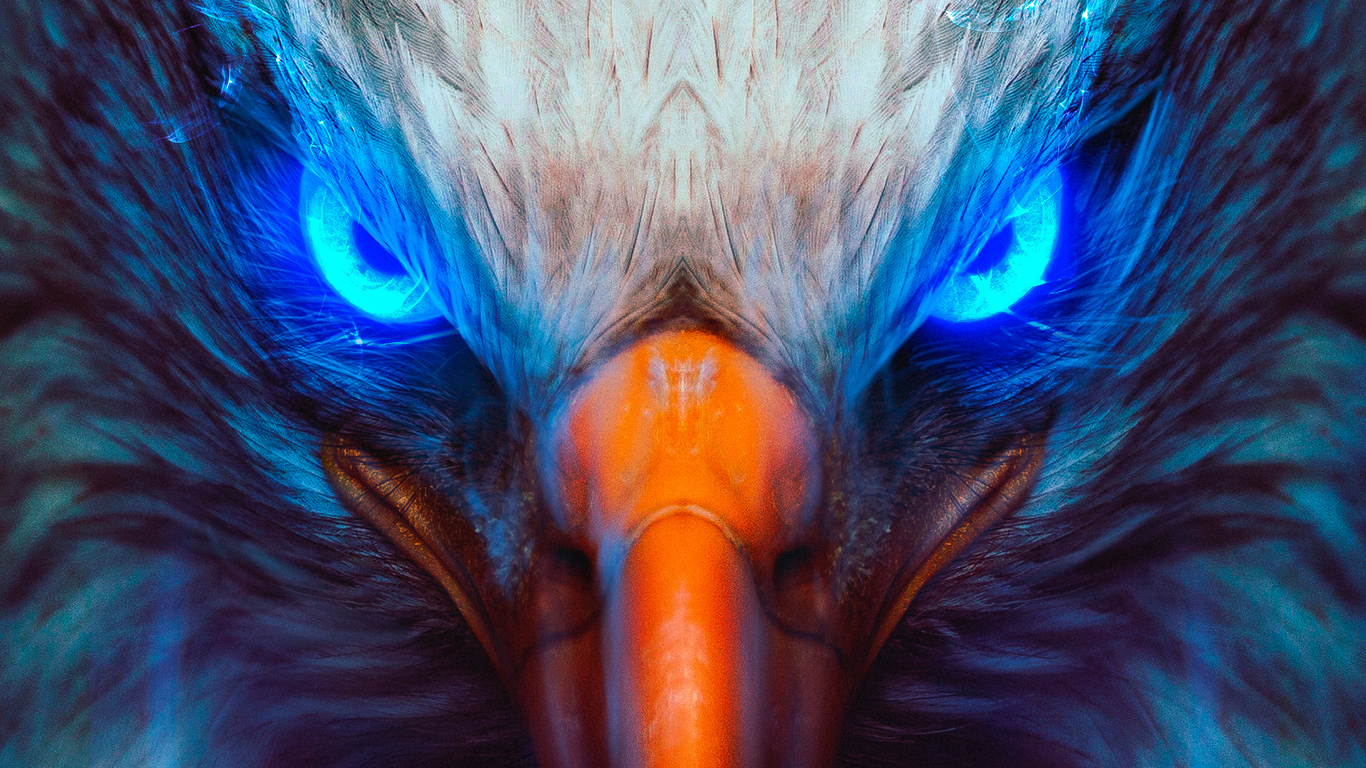

In [55]:
img= read_img('/content/drive/MyDrive/Images/1.jpg')

cv2_imshow(img)


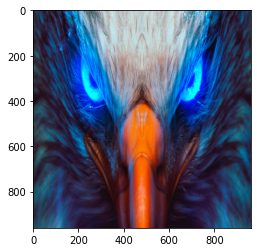

In [61]:
oimage=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
if oimage is None:
    print("cannot find image")
    sys.exit()
gsize=cv2.resize(oimage,(960,960))
plt.imshow(gsize,cmap='gray')

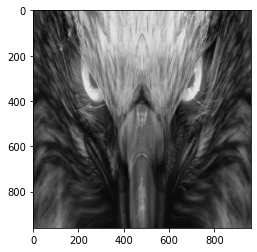

In [63]:
gimage=cv2.cvtColor(oimage,cv2.COLOR_BGR2GRAY)
gsize1=cv2.resize(gimage,(960,960))
plt.imshow(gsize1,cmap='gray')

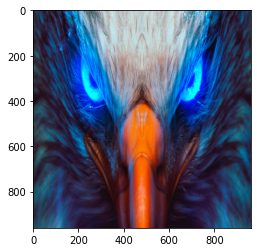

In [64]:
sgray=cv2.medianBlur(gsize1,13)
gsize2=cv2.resize(oimage,(960,960))
plt.imshow(gsize2,cmap='gray')

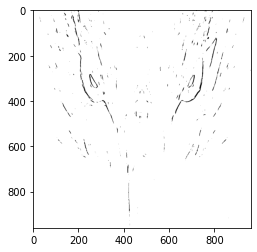

In [65]:
gedge=cv2.adaptiveThreshold(sgray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,7)
gsize3=cv2.resize(gedge,(960,960))
plt.imshow(gsize3,cmap='gray')


In [66]:
line_wdt=9

In [67]:
blur_value=7

In [68]:
totalColors=4

In [69]:
oimage=color_quantisation(oimage,totalColors)

In [70]:
def edge_detection(img,line_wdt,blur):
    gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_scale_Blur=cv2.medianBlur(gray_scale,blur)
    edges=cv2.adaptiveThreshold(gray_scale_Blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_wdt,blur)
    return edges

In [71]:
edgeImg= edge_detection(oimage,line_wdt,blur_value)

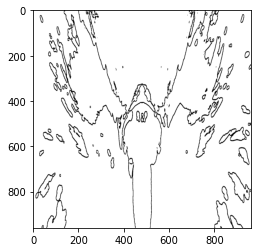

In [72]:
gsize3_1=cv2.resize(edgeImg,(960,960))
plt.imshow(gsize3_1,cmap='gray')

In [73]:
blurred=cv2.bilateralFilter(oimage,d=7,sigmaColor=150,sigmaSpace=150)

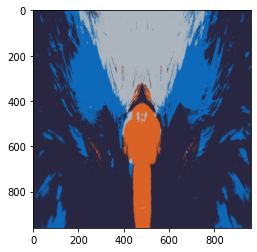

In [74]:
gsize4=cv2.resize(blurred,(960,960))
plt.imshow(gsize4,cmap='gray')


In [75]:
img=color_quantisation(img,totalColors)

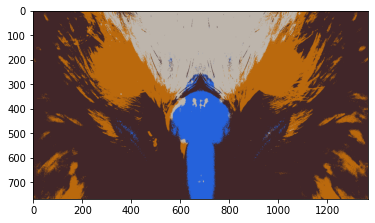

In [76]:
plt.imshow(img)

In [77]:
edgeImg= edge_detection(img,line_wdt,blur_value)

In [78]:
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=150,sigmaSpace=150)

In [79]:
cartoon=cv2.bitwise_and(blurred,blurred,mask=edgeImg)

In [80]:
cv2.imwrite('cartoon2.jpg',cartoon)

True